<a href="https://colab.research.google.com/github/Yongshilin/forage/blob/main/Forage_Quantium_DA_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Forage_Quantium_DA Project By Yongshi Lin

In [37]:
import pandas as pd
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from mlxtend.frequent_patterns import apriori, association_rules
import warnings

In [38]:
# to not show this line in the result: /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above. and should_run_async(code)
warnings.filterwarnings('ignore', category=DeprecationWarning)

#Import datasets:

In [39]:
custdata = pd.read_csv("/content/QVI_purchase_behaviour.csv")
transadata = pd.read_excel("/content/QVI_transaction_data.xlsx")

# Exploratory Data Analysis (Transaction Dataset)

In [40]:
# Examining the transaction data
trans_df = transadata.copy()   #use copy version
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [41]:
# Function to convert Excel integer date to datetime format
def excel_date_to_datetime(excel_date):
    return datetime(1899, 12, 30) + timedelta(days=int(excel_date))   #CSV and Excel integer dates begin on 30 Dec 1899

trans_df['DATE'] = trans_df['DATE'].apply(excel_date_to_datetime)
print(trans_df['DATE'].dtype) # check format of replacement date column

datetime64[ns]


In [42]:
trans_df = trans_df.dropna()  #drop null values

In [43]:
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [44]:
trans_df.shape

(264836, 8)

##### Make sure we are looking at the chip products by examining PROD_NAME.

In [45]:
# View all unique entries in the product name column
trans_df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

### Text Analysis to focus on chips





##### Remove digits, and special characters, and then sort the distinct words by frequency of occurrence.

In [46]:
# Remove digits
prod_name = trans_df['PROD_NAME'].str.replace(r'[0-9]+[gG]','');

# Remove "&" characters and replace with a space to separate flavours
prod_name = prod_name.str.replace(r'&',' ');

In [47]:
# Concatenate all cleaned product names into a single string, split into words, and create a Series; then count the frequency of the words
word_series = pd.Series(' '.join(prod_name).split())
word_counts = word_series.value_counts(sort=True)

# Display all rows of the word counts
with pd.option_context('display.max_rows', None):
    display(word_counts)

175g                  60561
Chips                 49770
150g                  41633
Kettle                41288
Smiths                28860
Salt                  27976
Cheese                27890
Pringles              25102
134g                  25102
Doritos               24962
Crinkle               23960
110g                  22387
Corn                  22063
Original              21560
Cut                   20754
Chip                  18645
170g                  18502
Salsa                 18094
Chicken               15407
Chilli                15390
165g                  15297
Sea                   14145
Thins                 14075
Sour                  13882
Crisps                12607
330g                  12540
Vinegar               12402
300g                  12041
RRD                   11894
Sweet                 11060
Infuzions             11057
Supreme               10963
Chives                10951
Cream                 10723
WW                    10320
Popd                

##### There are salsa products in the dataset but we are only interested in the chips category, so let's remove these.

##### (This is from the hint; without the hint, I actually cannot tell if there are other kind of category like cheese， which means this is the part we need further communication with the stores or the manager. I would also suggest that the stores should at least set up a standard for naming and identifying the product catergory for product names.)

In [48]:
trans_df = trans_df[~trans_df['PROD_NAME'].str.contains('salsa', case=False, na=False)]

In [49]:
trans_df.shape

(246742, 8)

In [50]:
# Create summaries of the transaction data
trans_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [51]:
# Check if there are any nans in the dataset
trans_df.isnull().values.any()

False

##### There are no nulls in the columns, but product quantity appears to have an outlier (max = 200 in one transaction).

### Check for Outliers

In [52]:
outliers = trans_df[trans_df['TOT_SALES'] >= 200]
outliers
# Insight: In store#226, a 'Premium' customer from 'Older Families' purchased 200 packs of 'Dorito Corn Chp Supreme 380g' in 2018 and 2019, contributed to 650*2=1300 dollars of sales in total.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [53]:
# check if this customer buy any other products
cust226000 = trans_df[trans_df['LYLTY_CARD_NBR'] == 226000]
cust226000

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


####Insight: This customer 226000 only purchased large amount of chips once a year in 2018, 2019, not like a regular retail customer. We can remove this outliner(customer) for further analysis.

In [54]:
# Remove the outliers
trans_df = trans_df[trans_df['LYLTY_CARD_NBR'] != 226000]
trans_df.shape  #check for a reduction of 2 rows

(246740, 8)

In [55]:
# Recheck the data summary
trans_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


### Number of Transactions Over Time

In [56]:
num_trans = trans_df.groupby('DATE').size()

# hold the aggregated results, count transactions per day
num_trans = num_trans.reset_index(name='Transaction Count')
num_trans.sort_values(by = 'DATE').head()

,DATE,Transaction Count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660


In [57]:
num_trans.shape

(364, 2)

#### Insight: Only 364 days in a year had transaction. Let's see which date and why no transaction on that specific date.

In [58]:
# Create a sequence of all dates within the range
all_dates = pd.date_range(start='2018-07-01', end='2019-06-30')
all_dates_df = pd.DataFrame({'DATE': all_dates})

# Merge with the transaction counts
transactions_by_day = pd.merge(all_dates_df, num_trans, on='DATE', how='left').fillna(0)

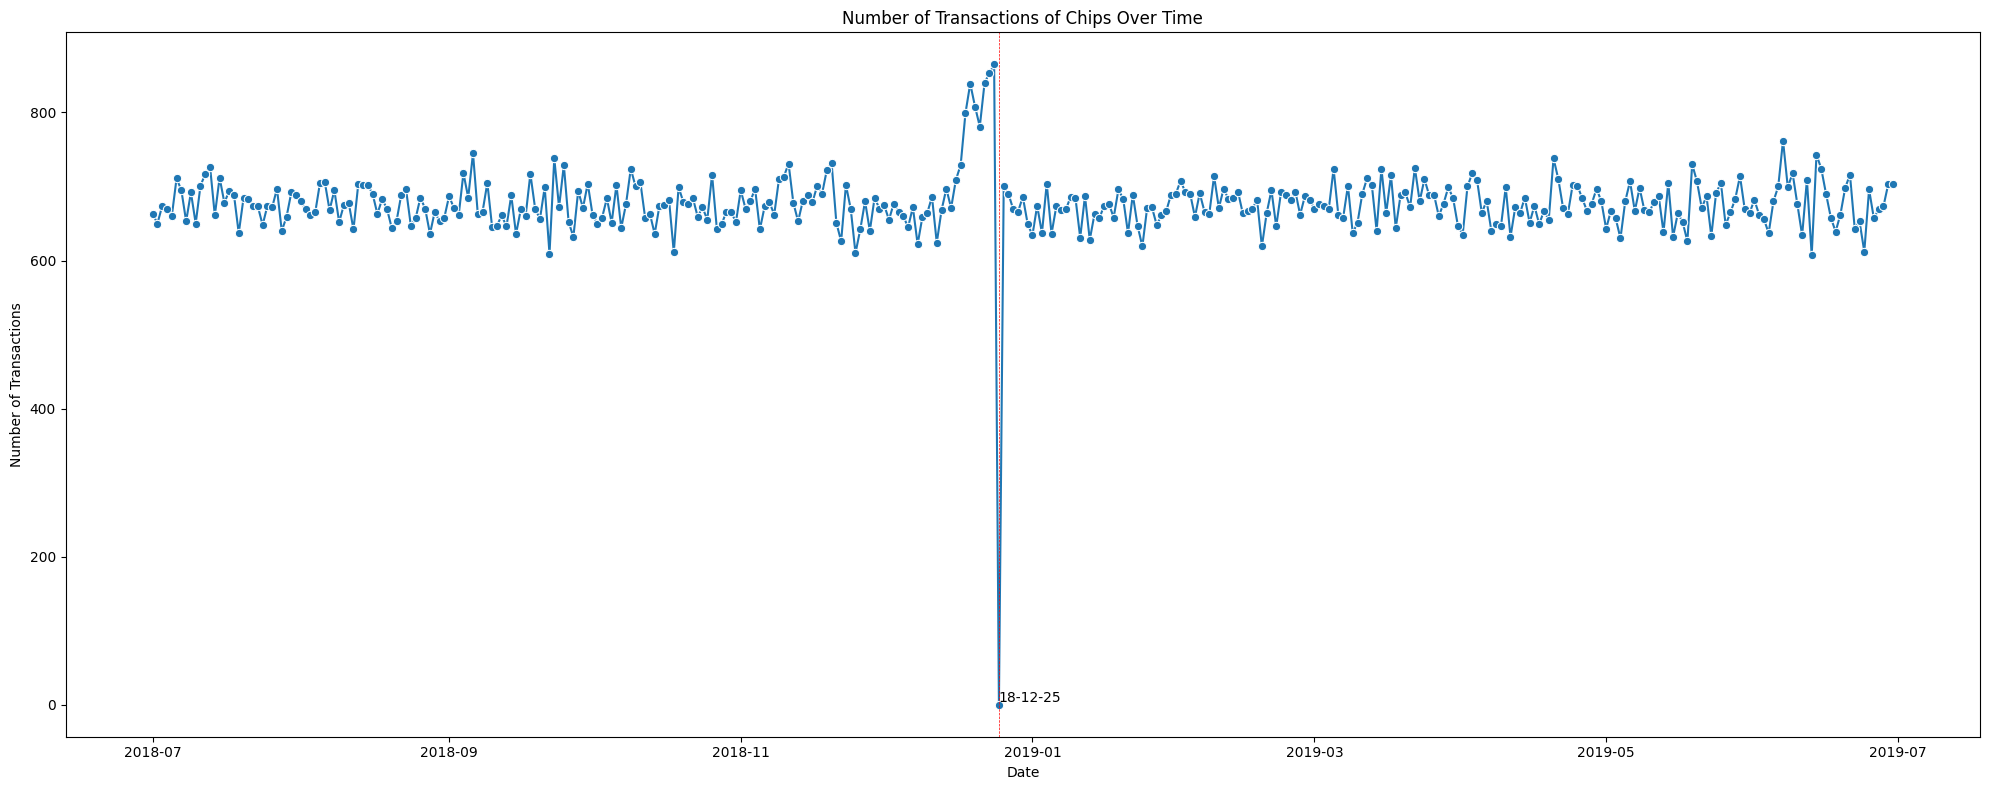

In [59]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=transactions_by_day, x='DATE', y='Transaction Count', marker='o')
plt.title('Number of Transactions of Chips Over Time')
plt.ylabel('Number of Transactions')
plt.xlabel('Date')

# Highlight the dates where transaction count is zero
zero_trans_dates = transactions_by_day[transactions_by_day['Transaction Count'] == 0]['DATE']
for zero_date in zero_trans_dates:
    plt.axvline(x=zero_date, color='red', linestyle='--', lw=0.5)
    plt.text(zero_date, 0.1, zero_date.strftime('%y-%m-%d'), verticalalignment ='bottom')
plt.tight_layout()
plt.show()

### Sales of Chips Over Time

In [60]:
# Group by DATE and sum the SALES
sales_by_date = trans_df.groupby('DATE')['TOT_SALES'].sum().reset_index()
sales_by_date.sort_values(by = 'TOT_SALES', ascending = False).head()

,DATE,TOT_SALES
176,2018-12-24,6410.9
175,2018-12-23,6372.1
171,2018-12-19,6164.7
174,2018-12-22,6079.8
172,2018-12-20,5942.8


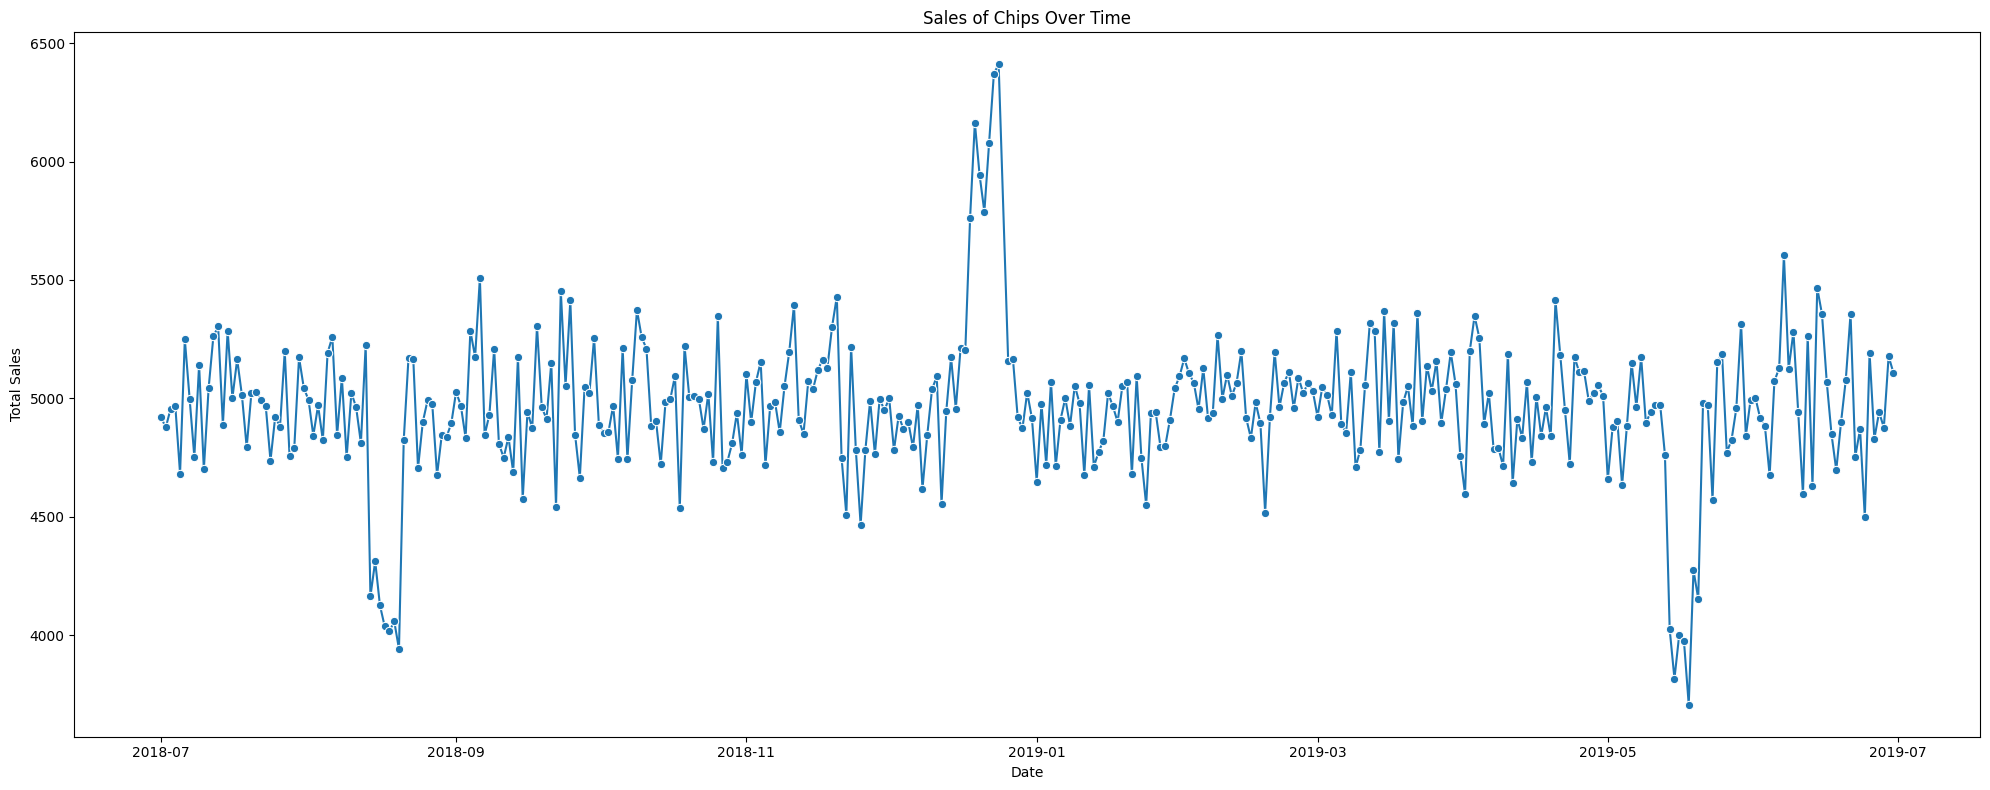

In [61]:
plt.figure(figsize=(20, 8))
sns.lineplot(data = sales_by_date, x = 'DATE', y = 'TOT_SALES', marker = 'o')
plt.title('Sales of Chips Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

#### Insight: Only 1 day there was no transaction happened, which is on Dec 25, 2018, Christmas Day. We can assume that the stores closed on this holiday date, which is normal. Also, the day before Christmas Day had the peak number of transaction and the peak total sales of chips, which shows the customer purchasing behavior.

##### Now that we are satisfied that the data no longer has outliers, we can move on to creating other features such as brand of chips or pack size from PROD_NAME. We will start with pack size.

In [62]:
# Extracting package size from the prod_name and make a new column as 'PACK_SIZE'
trans_df['PACK_SIZE(g)'] = trans_df['PROD_NAME'].str.extract(r'(\d+)g?', expand=False).astype(float)
trans_df.head(2)

## or
#trans_df.insert(8, "PACK_SIZE", trans_df['PROD_NAME'].str.extract('(\d+)').astype(float), True)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g)
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0


### Analyze the Package Size of Products

In [63]:
# Count of package size
sum_size = trans_df['PACK_SIZE(g)'].value_counts()
sum_size

PACK_SIZE(g)
175.0    66390
150.0    40203
134.0    25102
110.0    22387
170.0    19983
165.0    15297
330.0    12540
380.0     6416
270.0     6285
210.0     6272
200.0     4473
135.0     3257
250.0     3169
90.0      3008
190.0     2995
160.0     2970
220.0     1564
70.0      1507
180.0     1468
125.0     1454
Name: count, dtype: int64

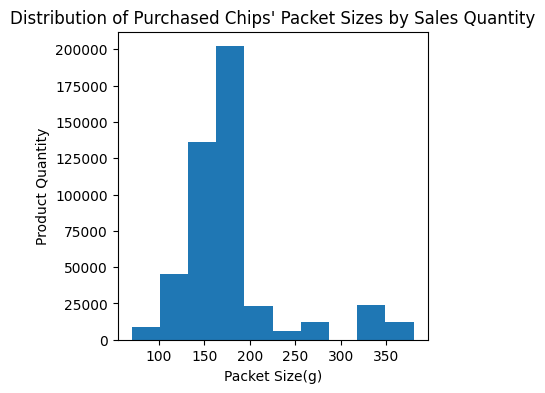

In [64]:
plt.figure(figsize=(4, 4))
plt.hist(trans_df['PACK_SIZE(g)'],weights=trans_df['PROD_QTY']); #
plt.title("Distribution of Purchased Chips' Packet Sizes by Sales Quantity")
plt.xlabel('Packet Size(g)')
plt.ylabel('Product Quantity')
plt.show()

#### Insight: The largest size is 380g and the smallest size is 70g, which is a reasonable range. For all customers, the most popular chips package size is 175g, then is 150g.

### Analyze the Brand

In [65]:
# Extracting brand name (assume the first word) from the prod_name and make a new column as 'BRAND'
trans_df['BRAND'] = trans_df['PROD_NAME'].apply(lambda x: x.split()[0])
# or
# trans_df['BRAND'] = trans_df['PROD_NAME'].str.split().str.get(0)
trans_df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs


In [66]:
# See the unique brand names
print(trans_df['BRAND'].unique())

['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'French' 'RRD' 'Tostitos'
 'Cheetos' 'Woolworths' 'Snbts' 'Sunbites']


##### It seems some names shared by the same brand. This is where I need more information to confirm the shorten names of the brand, which may involve communication with the stores or chips category manager.

In [67]:
# Replace different brand names regarding to the same brand
trans_df['BRAND'] = trans_df['BRAND'].replace({'Dorito':'Doritos', 'Smith':'Smiths', 'Snbts':'Sunbites', 'Infzns':'Infuzions', 'WW': 'Woolworths', 'NCC': 'Natural Chip Co', 'Natual': 'Natural Chip Co', 'Snbts':'Sunbites', 'GrnWves':'Grain Waves', 'Grain':'Grain Waves', 'Red':'Red Rock Deli', 'RRD':'Red Rock Deli'})
print(trans_df['BRAND'].unique())

['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain Waves' 'Doritos' 'Twisties'
 'Woolworths' 'Thins' 'Burger' 'Natural Chip Co' 'Cheezels' 'Infuzions'
 'Red Rock Deli' 'Pringles' 'Tyrrells' 'Cobs' 'French' 'Tostitos'
 'Cheetos' 'Sunbites']


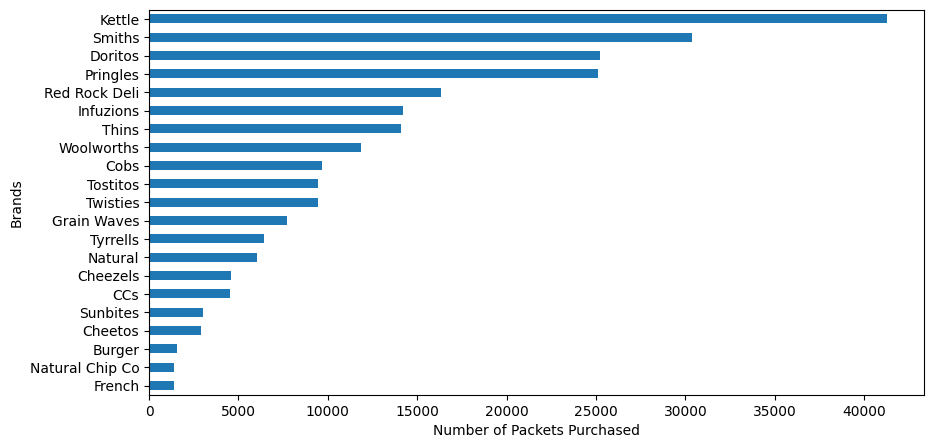

In [68]:
# Calculate the frequency of each brand and sort them
ax = trans_df['BRAND'].value_counts().sort_values(ascending = True).plot.barh(figsize=(10, 5))
ax.set_xlabel("Number of Packets Purchased")
ax.set_ylabel("Brands")
plt.show()

#### Insight: For all customers, Kettle is the most popular chips' brand; second is Smiths, third is Doritos.

### Analyze the Flavors

In [69]:
# Extracting flavor from the prod_name and make a new column as 'FLAVOR'
trans_df['FLAVOR'] = trans_df['PROD_NAME'].str.extract(r'(\b\w+(?=\s\d+g))', expand=False)
trans_df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND,FLAVOR
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,NaN
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,NaN


In [70]:
# replace repeated flavor names
trans_df['FLAVOR'] = trans_df['FLAVOR'].replace({'Chilli':'Chili', 'Onin':'Onion', 'OnionDip':'Onion', 'saltd': 'Salt', 'Salted': 'Salt', 'BBQ':'Barbecue'})
# fill in unknown flavor
trans_df['FLAVOR'] = trans_df['FLAVOR'].replace({'Chips':'unknown', 'Crips':'unknown', 'Crisps':'unknown', 'Bag': 'unknown', 'Supreme':'unknown'})
# fill in NaN to unkown flavor
trans_df['FLAVOR'] = trans_df['FLAVOR'].fillna('unknown')
print(trans_df['FLAVOR'].unique())

['unknown' 'Chicken' 'Onion' 'Chili' 'Vinegar' 'Jalapeno' 'Lime' 'Tangy'
 'Original' 'Rings' 'Chives' 'Box' 'Gcamole' 'FriedChicken' 'Barbecue'
 'Salt' 'Pesto' 'PotatoMix' 'Fig' 'Cheese' 'Seasonedchicken' 'Crackers'
 'Jam' 'Cream' 'Kettle' 'Burger' 'Spce' 'Coconut' 'Spicy' 'Maple' 'Puffs'
 'Ricotta' 'Chipotle' 'Flavour' 'Mstrd' 'Balls' 'Vingar' 'Strws' 'Garlic'
 'Papadums' 'Chimuchurri' 'Sauce' 'Vinegr' 'Aioli' 'Belly' 'Bolognese']


In [71]:
# Count of flavor
sum_flavor = trans_df['FLAVOR'].value_counts()
sum_flavor.head()

FLAVOR
unknown     67969
Original    15421
Chicken     12303
Vinegar     10928
Chili        9501
Name: count, dtype: int64

#### Insight: Too much unknown prefered flavors for all the customers, the analysis of flavor might be biased, thus no further exploration in flavor analysis.

In [72]:
# Examining customer data
cust_df = custdata.copy()
cust_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [73]:
# Rename "PREMIUM_CUSTOMER" to "MEMBERSHIP" for easier identification of the column data
cust_df = cust_df.rename(columns={'PREMIUM_CUSTOMER': 'MEMBERSHIP'})

In [74]:
# check null value
cust_df.isna().sum()

LYLTY_CARD_NBR    0
LIFESTAGE         0
MEMBERSHIP        0
dtype: int64

In [75]:
# check categorical values
cust_df['MEMBERSHIP'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [76]:
# check categorical values
cust_df['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

##### Since the customer dataset looks fine, we can now merge the customer dataset and the transaction dataset.

#Merge datasets and get overview:

In [77]:
merge_df = trans_df.merge(cust_df, how = 'left', on = 'LYLTY_CARD_NBR')
merge_df.to_csv('QVI_merged_dataset.csv')  #save as csv file

In [78]:
merge_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE(g)', 'BRAND', 'FLAVOR',
       'LIFESTAGE', 'MEMBERSHIP'],
      dtype='object')

In [79]:
merge_df.shape

(246740, 13)

##### See if any transactions did not have a matched customer

In [80]:
# Check if some customers were not matched on by checking for nulls
print(merge_df['LIFESTAGE'].isna().sum())
print(merge_df['MEMBERSHIP'].isna().sum())

0
0


##Overview

In [ ]:
# Top 10 best selling products overall
sales_prod_name = trans_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top10_prod = sales_prod_name.sort_values(by = 'TOT_SALES', ascending = False).head(10)
prod_count = sales_prod_name['PROD_NAME'].nunique()

print(f"We are selling {prod_count} kinds of chip products.")
print("Top 10 best-selling products:\n",top10_prod)

We are selling 105 kinds of chip products.
Top 10 best-selling products:
                                    PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g    39052.0
79    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
71  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
31    Kettle Mozzarella   Basil & Pesto 175g    34457.4
70         Smiths Crinkle      Original 330g    34302.6
6                       Cheezels Cheese 330g    34296.9
12          Doritos Cheese      Supreme 330g    33390.6
37   Kettle Sweet Chilli And Sour Cream 175g    33031.8
32                      Kettle Original 175g    32740.2
33      Kettle Sea Salt     And Vinegar 175g    32589.0


In [ ]:
# total sales summary
total_sales_sum = merge_df['TOT_SALES'].sum()
total_sales_mean = merge_df['TOT_SALES'].mean()
total_sales_median = merge_df['TOT_SALES'].median()
print(f"Total Sales Sum: {total_sales_sum}")
print(f"Total Sales Mean: {total_sales_mean}")
print(f"Total Sales Median: {total_sales_median}")

Total Sales Sum: 1805177.6999999997
Total Sales Mean: 7.3161129123774
Total Sales Median: 7.4


#### Total Sales Distribution

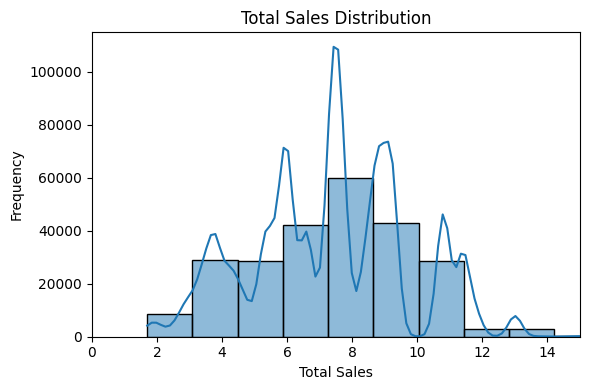

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(merge_df['TOT_SALES'], bins =20, kde=True)
plt.title('Total Sales Distribution')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')

# Adjust x-axis limits
plt.xlim(0, 15)  # Set the limit according the data distribution

plt.tight_layout()
plt.show()

#### Insight:
- Overall, the stores sell 105 kinds of chips in total, and the total revenue of chips is 1805177.70 dollars.
- Customers spend 2-14 dollars on chips per transaction, averagely spend 7.3 dollars on chips per transaction.

# Data Analysis On Customer Segments

#### Now that the data is ready for analysis, we can define some metrics of interest to the client:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

We could also ask our data team for more information. Examples are:
- The customer's total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips
- Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips


# Analyze Customer Behavior

### Customer Lifestage Summary

In [ ]:
# Highest sales by LIFESTAGE
sales_by_lifestage = merge_df.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False)
print(f"Sales by LIFESTAGE: \n{sales_by_lifestage}")

Sales by LIFESTAGE: 
LIFESTAGE
OLDER SINGLES/COUPLES     376019.65
RETIREES                  342381.90
OLDER FAMILIES            328519.90
YOUNG FAMILIES            294627.90
YOUNG SINGLES/COUPLES     243756.60
MIDAGE SINGLES/COUPLES    172523.80
NEW FAMILIES               47347.95
Name: TOT_SALES, dtype: float64


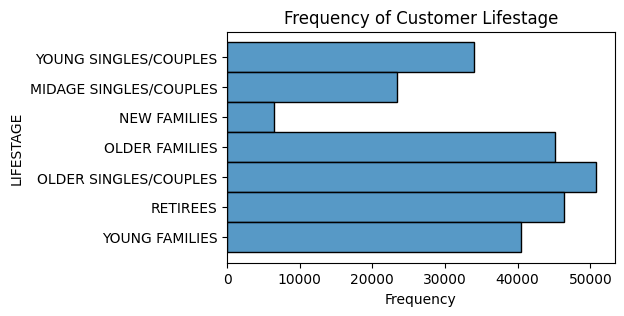

In [81]:
# Count of Customer Lifestage
plt.figure(figsize=(5, 3))
sns.histplot(data=merge_df, y='LIFESTAGE')
plt.title('Count of Customer Lifestage')
plt.xlabel('Frequency')
plt.show()

#### Insight: 'New families' customers purchased chips the least among all the Customer Lifestage groups.

### Customer Membership Summary

In [ ]:
# Highest sales by Customer Membership
sales_by_membership = merge_df.groupby('MEMBERSHIP')['TOT_SALES'].sum().sort_values(ascending = False)
print(f"Sales by Customer Membership: \n{sales_by_membership}")

Sales by Customer Membership: 
MEMBERSHIP
Mainstream    700865.40
Budget        631406.85
Premium       472905.45
Name: TOT_SALES, dtype: float64


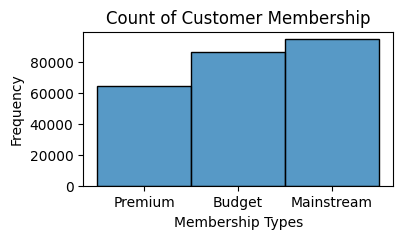

In [231]:
# Count of Customer Membership
plt.figure(figsize=(4, 2))
sns.histplot(merge_df, x='MEMBERSHIP')
plt.title("Count of Customer Membership")
plt.ylabel('Frequency')
plt.xlabel('Membership Types')
plt.show()

##### Let's start with calculating total sales by LIFESTAGE and MEMBERSHIP and plotting the split by these segments to describe which customer segment contribute most to chip sales.

## Total Sales by Customer Lifestage & Membership

In [83]:
# total sales of all customers
total_sales = merge_df['TOT_SALES'].agg(['sum'])['sum']

In [234]:
# calculate total sales by customer liferstage & membership types and generate a split
cust_sales = merge_df.groupby(['LIFESTAGE', 'MEMBERSHIP'], as_index = False)['TOT_SALES'].sum()
cust_sales.rename(columns = {'TOT_SALES': 'Sum of Total Sales'},inplace = True)
cust_sales.sort_values(by = 'Sum of Total Sales', ascending = False).head(3)

,LIFESTAGE,MEMBERSHIP,Sum of Total Sales
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95


In [235]:
total_sales_breakdown = merge_df.groupby(['LIFESTAGE', 'MEMBERSHIP'])['TOT_SALES'].sum().unstack('MEMBERSHIP')
## if want to unstack sum & mean:
# total_sales_breakdown = merge_df.groupby(['LIFESTAGE', 'MEMBERSHIP'])['TOT_SALES'].agg(['sum','mean']).unstack('MEMBERSHIP')
# .fillna(0) if there are null values
total_sales_breakdown

MEMBERSHIP,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,33345.70,84734.25,54443.85
NEW FAMILIES,20607.45,15979.70,10760.80
OLDER FAMILIES,156863.75,96413.55,75242.60
OLDER SINGLES/COUPLES,127833.60,124648.50,123537.55
RETIREES,105916.30,145168.95,91296.65
YOUNG FAMILIES,129717.95,86338.25,78571.70
YOUNG SINGLES/COUPLES,57122.10,147582.20,39052.30


##### DV referrence: https://stackoverflow.com/questions/21397549/horizontal-stacked-bar-plot-and-add-labels-to-each-section/64202669#64202669

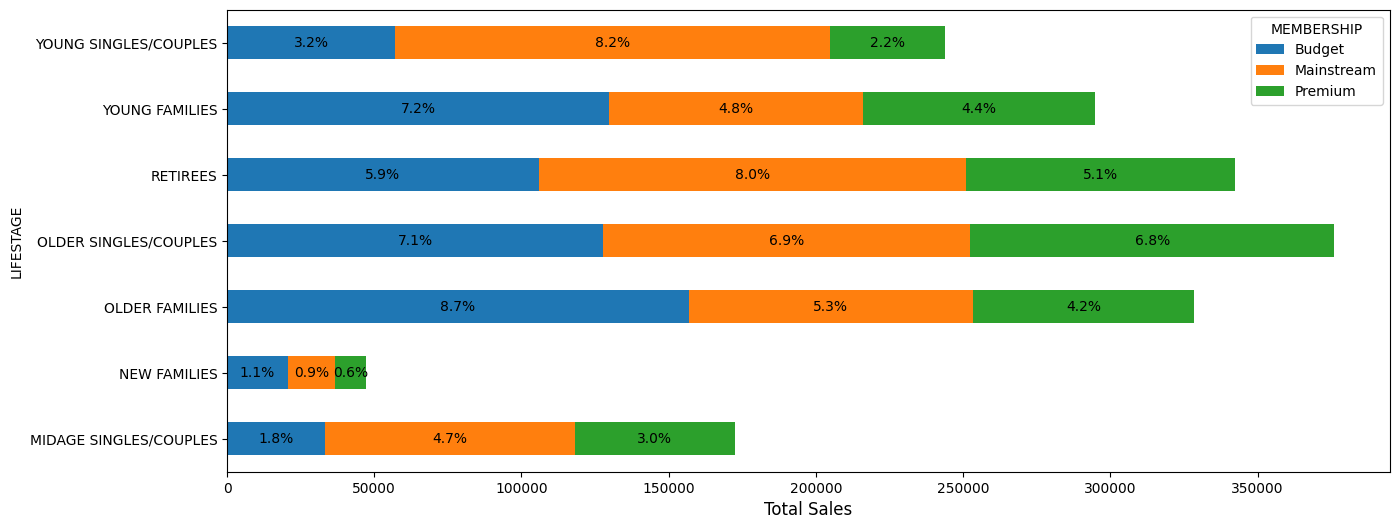

In [86]:
# matplotlib v3.4.2 # python < 3.8
ax = total_sales_breakdown.plot(kind='barh', stacked=True, figsize=(15, 6))
for c in ax.containers:
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{v.get_width() / total_sales * 100:.1f}%' if v.get_width() > 0 else '' for v in c ]
    # set the bar label
    ax.bar_label(c, labels=labels, label_type='center')

    # uncomment and use the next line if there are no nan or 0 length sections; just use fmt to add a % (the previous two lines of code are not needed, in this case)
    # ax.bar_label(c, fmt='%.f%%', label_type='center')

# ax.legend(bbox_to_anchor=(1.025, 1), loc='upper left') ## move the legend

ax.set_xlabel("Total Sales", fontsize=12)
plt.show()

##### DV code before matplotlib v3.4.2

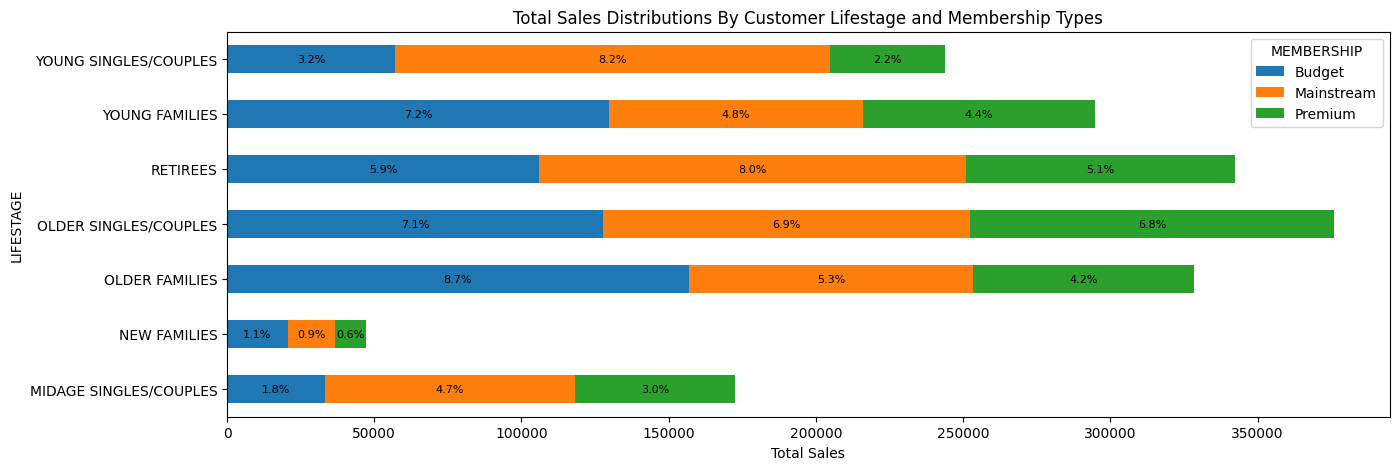

In [87]:
# referrence: https://stackoverflow.com/questions/21397549/horizontal-stacked-bar-plot-and-add-labels-to-each-section/64202669#64202669
# https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels/60895640#60895640
ax = total_sales_breakdown.plot(kind='barh', stacked=True, figsize=(15, 5))

# Add percentages of the summed total sales as labels to each bar
# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    label = width / total_sales * 100
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{(label):.1f}%'

    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2

    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

ax.set_xlabel("Total Sales")
ax.set_title('Total Sales Distributions By Customer Lifestage and Membership Types')
plt.show()

#### Insight: Budget - Older Families takes up the largest proporation of sales. Second is Mainstream - Young Singles/Couples; third is Mainstream - Retirees.
To analyze further why these 3 customer segments contributed to the largest amount & porporation of chips' sales, see 1) the number/porporation of all customer segments; 2) the purchase amount of chips OR unit chips' sales among all customer segments; 3) the unit price of product.

##### see if the higher sales are due to there being more customers who buy chips.

### 1) Number of Customers by LIFESTAGE and MEMBERSHIP

In [88]:
# Plot the numbers of customers in each segment
cust_sum= merge_df.groupby(['LIFESTAGE','MEMBERSHIP'])['LYLTY_CARD_NBR'].agg('nunique').unstack('MEMBERSHIP').fillna(0)
cust_sum

MEMBERSHIP,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1474,3298,2369
NEW FAMILIES,1087,830,575
OLDER FAMILIES,4611,2788,2231
OLDER SINGLES/COUPLES,4849,4858,4682
RETIREES,4385,6358,3812
YOUNG FAMILIES,3953,2685,2398
YOUNG SINGLES/COUPLES,3647,7917,2480


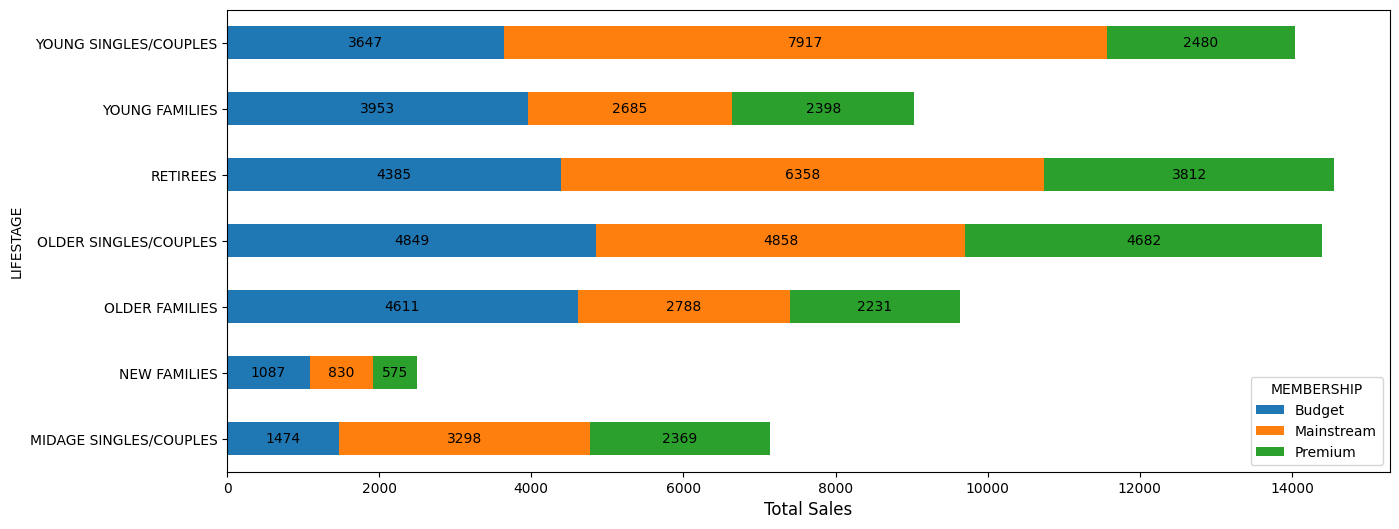

In [89]:
# matplotlib v3.4.2 # python < 3.8
ax = cust_sum.plot(kind='barh', stacked=True, figsize=(15, 6))
for c in ax.containers:
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{int(v.get_width())}' if v.get_width() > 0 else '' for v in c ]
    # set the bar label
    ax.bar_label(c, labels=labels, label_type='center')

    # uncomment and use the next line if there are no nan or 0 length sections; just use fmt to add a % (the previous two lines of code are not needed, in this case)
    # ax.bar_label(c, fmt='%.f%%', label_type='center')

# ax.legend(bbox_to_anchor=(1.025, 1), loc='upper left') ## move the legend

ax.set_xlabel("Total Sales", fontsize=12)
plt.show()

#### Insight: There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips, which contributes to the total sales of the segements,  but this is not a major case for the Budget - Older families segment.

### 2) Unit of Chips Purchased by LIFESTAGE & MEMBERSHIP

In [90]:
# Calculate the average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units = merge_df.groupby(['LIFESTAGE', 'MEMBERSHIP']).agg(
    {'PROD_QTY': 'sum', 'LYLTY_CARD_NBR': 'nunique'}
).reset_index()
# Calculate the average units per customer
avg_units['AVG'] = avg_units['PROD_QTY'] / avg_units['LYLTY_CARD_NBR']
# Order by average units (descending)
avg_units = avg_units.sort_values(by='AVG', ascending=False)
avg_units.head()

,LIFESTAGE,MEMBERSHIP,PROD_QTY,LYLTY_CARD_NBR,AVG
7,OLDER FAMILIES,Mainstream,25804,2788,9.255380
6,OLDER FAMILIES,Budget,41853,4611,9.076773
8,OLDER FAMILIES,Premium,20239,2231,9.071717
15,YOUNG FAMILIES,Budget,34482,3953,8.722995
17,YOUNG FAMILIES,Premium,20901,2398,8.716013


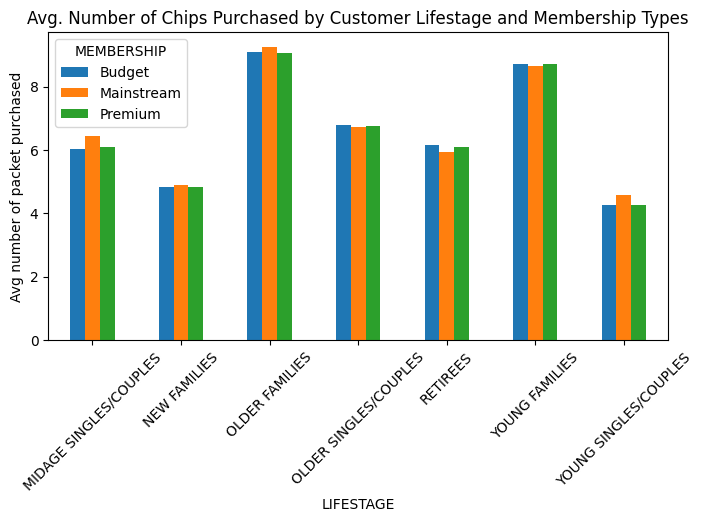

In [91]:
# Plotting the bar chart
ax = avg_units.pivot(index='LIFESTAGE', columns='MEMBERSHIP', values='AVG').plot(kind='bar', stacked=False, figsize=(8, 4))
ax.set_ylabel("Avg number of packet purchased")
ax.set_title('Avg. Number of Chips Purchased by Customer Lifestage and Membership Types')
plt.xticks(rotation=45)
plt.show()

#### Insight: Older Families & Young Families buy more chips per customer.

### 3) Unique price by LIFESTAGE & MEMBERSHIP

In [92]:
# Calculate the total units and total sales by LIFESTAGE and MEMBERSHIP
unit_price = merge_df.groupby(['LIFESTAGE', 'MEMBERSHIP']).agg(
    {'PROD_QTY': 'sum', 'TOT_SALES': 'sum'}).reset_index()
# Calculate the unit price
unit_price['Unit_Price'] = unit_price['TOT_SALES'] / unit_price['PROD_QTY']
# Order by unit_price
unit_price = unit_price.sort_values(by='Unit_Price', ascending=False)
unit_price.head()

,LIFESTAGE,MEMBERSHIP,PROD_QTY,TOT_SALES,Unit_Price
19,YOUNG SINGLES/COUPLES,Mainstream,36225,147582.20,4.074043
1,MIDAGE SINGLES/COUPLES,Mainstream,21213,84734.25,3.994449
4,NEW FAMILIES,Mainstream,4060,15979.70,3.935887
12,RETIREES,Budget,26932,105916.30,3.932731
3,NEW FAMILIES,Budget,5241,20607.45,3.931969


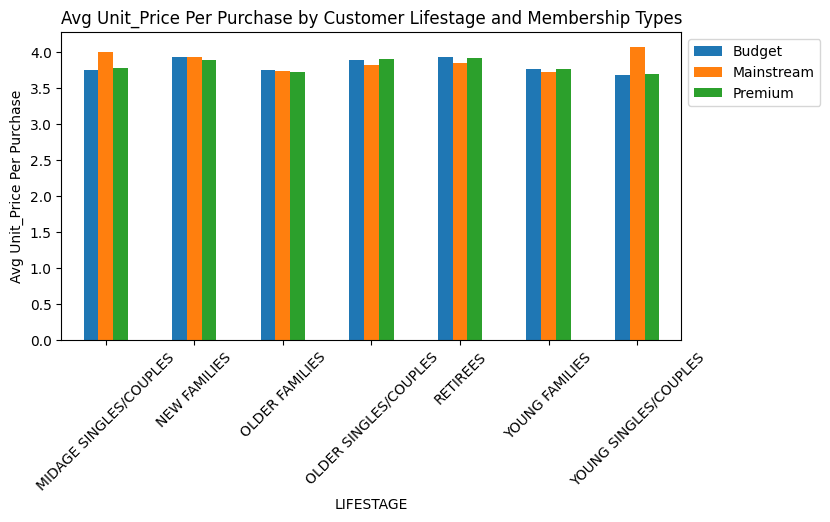

In [93]:
# Plotting the bar chart
ax = unit_price.pivot(index='LIFESTAGE', columns='MEMBERSHIP', values='Unit_Price').plot(kind='bar', stacked=False, figsize=(8, 4))
ax.set_ylabel("Avg Unit_Price Per Purchase")
ax.set_title('Avg Unit_Price Per Purchase by Customer Lifestage and Membership Types')
plt.xticks(rotation=45)
plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
plt.show()

#### Insight: Mainstream-Young & Midage singles and couples are more willing to pay more per packet of chips compared to the non-mainstream ones. Same pattern shown in the previous graph that the Mainstream-Young & Midage singles and couples are more willing to buy larger number of packet of chips on average.
We can do further analysis about the non-maintream Young & Midage singles and couples preferrences of snacks over chips.

## Deep dive into specific customer segments for insights
We have found quite a few interesting insights that we can dive deeper into.
We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips.
Use affinity analysis or a-priori
analysis to learn the brands that these two customer segments prefer
more than others(Market Basket Analysis).
##### Affinity Analysis: https://www.kaggle.com/code/akhilram7/affinity-analysis-of-market-basket
##### ML-Apriori Analysis: https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/

### Analyze the Brands Preference of the Top Customer Group Buyers (Apriori  Analysis)

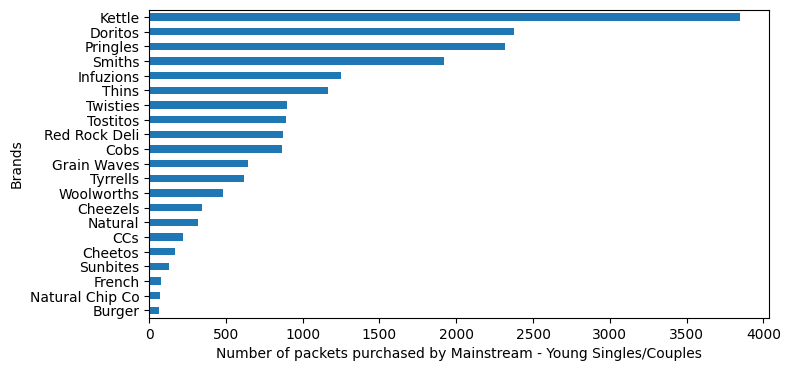

In [197]:
# overview of the count of brands purchased by Mainstream - Young Singles/Couples
main_young = merge_df[(merge_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (merge_df['MEMBERSHIP'] == 'Mainstream')]
ax = main_young["BRAND"].value_counts().sort_values(ascending = True).plot.barh(figsize=(8, 4))
ax.set_xlabel("Number of packets purchased by Mainstream - Young Singles/Couples")
ax.set_ylabel("Brands")
plt.show()

In [170]:
# Create customer segment column
temp = merge_df.copy()
temp['Segment'] = temp['MEMBERSHIP'] + " - "  + temp["LIFESTAGE"]
segment = pd.get_dummies(temp['Segment'])
brand = pd.get_dummies(temp["BRAND"])
basket = segment.join(brand)

# Generate frequent itemsets
freq_item = apriori(basket, min_support=0.008, use_colnames=True)

# Generate the association rules
rules = association_rules(freq_item, metric="lift", min_threshold=1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

set_temp = temp['Segment'].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19,(Mainstream - YOUNG SINGLES/COUPLES),(Kettle),0.079209,0.167334,0.015579,0.196684,1.175400,0.002325,1.036537,0.162062
9,(Mainstream - MIDAGE SINGLES/COUPLES),(Kettle),0.044966,0.167334,0.008657,0.192519,1.150508,0.001132,1.031190,0.136978
5,(Budget - RETIREES),(Kettle),0.057652,0.167334,0.010505,0.182214,1.088926,0.000858,1.018196,0.086660
25,(Premium - RETIREES),(Kettle),0.049591,0.167334,0.008981,0.181105,1.082296,0.000683,1.016816,0.080006
3,(Budget - OLDER SINGLES/COUPLES),(Kettle),0.069596,0.167334,0.012422,0.178488,1.066658,0.000776,1.013578,0.067167
23,(Premium - OLDER SINGLES/COUPLES),(Kettle),0.067115,0.167334,0.011944,0.177959,1.063495,0.000713,1.012925,0.064000
13,(Mainstream - RETIREES),(Kettle),0.080935,0.167334,0.013723,0.169554,1.013269,0.000180,1.002674,0.014248
1,(Budget - OLDER FAMILIES),(Smiths),0.087193,0.123016,0.011948,0.137027,1.113895,0.001222,1.016236,0.112016
7,(Budget - YOUNG FAMILIES),(Smiths),0.071991,0.123016,0.009459,0.131397,1.068126,0.000603,1.009648,0.068729
16,(Mainstream - YOUNG SINGLES/COUPLES),(Doritos),0.079209,0.102229,0.009642,0.121725,1.190712,0.001544,1.022198,0.173944


In [107]:
# Mainstream - Young Singles/Couples
rules[rules['antecedents'] == {'Mainstream - YOUNG SINGLES/COUPLES'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19,(Mainstream - YOUNG SINGLES/COUPLES),(Kettle),0.079209,0.167334,0.015579,0.196684,1.175400,0.002325,1.036537,0.162062
16,(Mainstream - YOUNG SINGLES/COUPLES),(Doritos),0.079209,0.102229,0.009642,0.121725,1.190712,0.001544,1.022198,0.173944
21,(Mainstream - YOUNG SINGLES/COUPLES),(Pringles),0.079209,0.101735,0.009382,0.118451,1.164310,0.001324,1.018962,0.153262


#### Insight: From Apriori Analysis:
- we can see that for most of the customer segments, Kettle is the most favorable brand ,which is also the most popular brand for Mainstream - young singles/couples.
- To see further what brands the segment prefers more than the other segments, we can do Affinity Analysis.

### Analyze the Brands Preference of the Top Customer Group Buyers (Brand Affinity Analysis)

In [136]:
def affinity_analysis(df, target_lifestage, target_membership):
    """
    Calculate brand affinity for a specific segment.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    target_lifestage (str): Lifestage to filter by (e.g., 'OLDER FAMILIES').
    target_premium_customer (str): Premium customer type to filter by (e.g., 'Budget').

    Returns:
    pd.DataFrame: DataFrame with brand affinity comparison sorted by affinity.
    """

    # Filter data for the target group
    segment = merge_df[(merge_df['LIFESTAGE'] == target_lifestage) & (merge_df['MEMBERSHIP'] == target_membership)]
    others = merge_df[~((merge_df['LIFESTAGE'] == target_lifestage) & (merge_df['MEMBERSHIP'] == target_membership))]

    # Calculate brand proportion for the target group
    qty_segment = segment['PROD_QTY'].sum()
    brand_qty_segment = segment.groupby(['BRAND'])['PROD_QTY'].sum().reset_index()
    brand_qty_segment['target_proportion'] = brand_qty_segment['PROD_QTY'] / qty_segment
    brand_qty_segment = brand_qty_segment.drop(columns='PROD_QTY')

    # Calculate brand proportion for the rest of the population
    qty_others = others['PROD_QTY'].sum()
    brand_qty_others = others.groupby(['BRAND'])['PROD_QTY'].sum().reset_index()
    brand_qty_others['others_proportion'] = brand_qty_others['PROD_QTY'] / qty_others
    brand_qty_others = brand_qty_others.drop(columns='PROD_QTY')

    # Compare proportions
    brand_compar = brand_qty_segment.merge(brand_qty_others, on=['BRAND']).fillna(0)
    brand_compar['affinity'] = brand_compar['target_proportion'] / brand_compar['others_proportion']

    # Sort by affinity
    brand_compar_sorted = brand_compar.sort_values(by='affinity', ascending=False)

    return brand_compar_sorted

In [140]:
# Calculate brand affinity for Budget - Older Families
brand_affinity_df = affinity_analysis(merge_df, 'OLDER FAMILIES', 'Budget')
print(f'Budget - Older Families:\n' ,brand_affinity_df.head(3))

Budget - Older Families:
               BRAND  target_proportion  others_proportion  affinity
11  Natural Chip Co           0.007622           0.005514  1.382286
13    Red Rock Deli           0.079182           0.064350  1.230485
20       Woolworths           0.056268           0.046618  1.207007


In [142]:
# Calculate brand affinity for Mainstream - Retirees
brand_affinity_df2 = affinity_analysis(merge_df, 'RETIREES', 'Mainstream')
print(f'Mainstream - Retirees:\n', brand_affinity_df2.tail(3))

Mainstream - Retirees:
             BRAND  target_proportion  others_proportion  affinity
20     Woolworths           0.044112           0.047770  0.923426
13  Red Rock Deli           0.060010           0.066163  0.907010
6          French           0.004698           0.005699  0.824352


In [139]:
# Calculate brand affinity for Mainstream - Young Singles/Couples
brand_affinity_df3 = affinity_analysis(merge_df, 'YOUNG SINGLES/COUPLES', 'Mainstream')
print(f'Mainstream - Young Singles/Couples:\n', brand_affinity_df3)

Mainstream - Young Singles/Couples:
               BRAND  target_proportion  others_proportion  affinity
19         Tyrrells           0.031553           0.025692  1.228095
18         Twisties           0.046184           0.037877  1.219319
5           Doritos           0.122761           0.101075  1.214553
9            Kettle           0.197985           0.165553  1.195897
17         Tostitos           0.045411           0.037978  1.195713
12         Pringles           0.119420           0.100635  1.186670
4              Cobs           0.044638           0.039049  1.143124
8         Infuzions           0.064679           0.057065  1.133435
16            Thins           0.060373           0.056986  1.059423
7       Grain Waves           0.032712           0.031188  1.048873
3          Cheezels           0.017971           0.018647  0.963753
14           Smiths           0.096370           0.124584  0.773536
6            French           0.003948           0.005758  0.685569
2          

#### Insight: By using the affinity index, we can see that:
- Budget - Older Families are 38% more likely to buy Natural Chip Co chips than the rest of the customers.
- Mainstream - Retirees are 18% less likely to buy French chips than the rest of the customers.
- Mainstream - Young Singles/Couples are 23% more likely to purcahse Tyrrells chips than the other segments. However, they are 56% less likely to purchase Burger Rings compared to the rest of the population.

### Analyze the Product Size Preference of the Top Customer Group Buyers (Apriori Analysis)

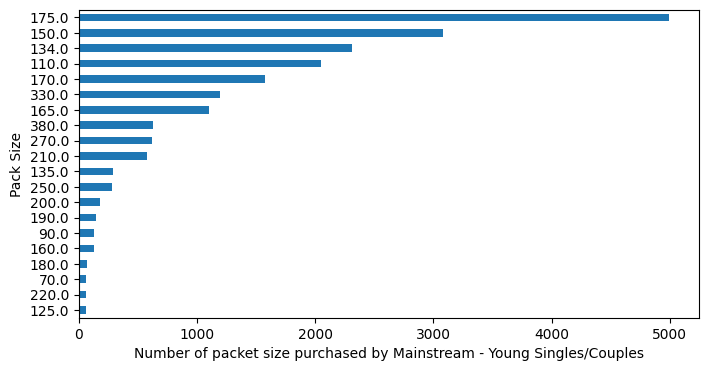

In [199]:
# overview of the count of packet size purchased by Mainstream - Young Singles/Couples
ax = main_young["PACK_SIZE(g)"].value_counts().sort_values(ascending = True).plot.barh(figsize=(8, 4))
ax.set_xlabel("Number of packet size purchased by Mainstream - Young Singles/Couples")
ax.set_ylabel("Pack Size")
plt.show()

In [213]:
segment = pd.get_dummies(temp['Segment'])
size = pd.get_dummies(temp["PACK_SIZE(g)"])
basket2 = segment.join(size)

# Generate frequent itemsets
freq_item2 = apriori(basket2, min_support=0.01, use_colnames=True)

# Generate the association rules
rules2 = association_rules(freq_item2, metric="lift", min_threshold=0.5)
rules2 = rules2.sort_values(['confidence', 'lift'], ascending =[False, False])

set_temp = temp['Segment'].unique()
rules2[rules2["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
40,(Premium - YOUNG FAMILIES),(175.0),0.043706,0.269069,0.012150,0.278004,1.033210,0.000391,1.012377,0.033612
12,(Budget - YOUNG FAMILIES),(175.0),0.071991,0.269069,0.019944,0.277037,1.029613,0.000574,1.011021,0.030992
16,(Mainstream - OLDER FAMILIES),(175.0),0.053664,0.269069,0.014542,0.270977,1.007091,0.000102,1.002617,0.007440
33,(Premium - OLDER FAMILIES),(175.0),0.042162,0.269069,0.011413,0.270691,1.006030,0.000068,1.002225,0.006258
8,(Budget - RETIREES),(175.0),0.057652,0.269069,0.015591,0.270439,1.005094,0.000079,1.001879,0.005379
38,(Premium - RETIREES),(175.0),0.049591,0.269069,0.013399,0.270186,1.004154,0.000055,1.001531,0.004353
2,(Budget - OLDER FAMILIES),(175.0),0.087193,0.269069,0.023539,0.269964,1.003327,0.000078,1.001226,0.003632
6,(Budget - OLDER SINGLES/COUPLES),(175.0),0.069596,0.269069,0.018744,0.269334,1.000985,0.000018,1.000363,0.001058
36,(Premium - OLDER SINGLES/COUPLES),(175.0),0.067115,0.269069,0.018068,0.269203,1.000499,0.000009,1.000184,0.000535
14,(Mainstream - MIDAGE SINGLES/COUPLES),(175.0),0.044966,0.269069,0.012057,0.268139,0.996544,-0.000042,0.998729,-0.003618


In [214]:
# Mainstream - Young Singles/Couples
rules2[rules2['antecedents'] == {'Mainstream - YOUNG SINGLES/COUPLES'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(Mainstream - YOUNG SINGLES/COUPLES),(175.0),0.079209,0.269069,0.020252,0.255679,0.950239,-0.001061,0.982012,-0.053811
29,(Mainstream - YOUNG SINGLES/COUPLES),(150.0),0.079209,0.162937,0.012483,0.157593,0.967205,-0.000423,0.993657,-0.035516


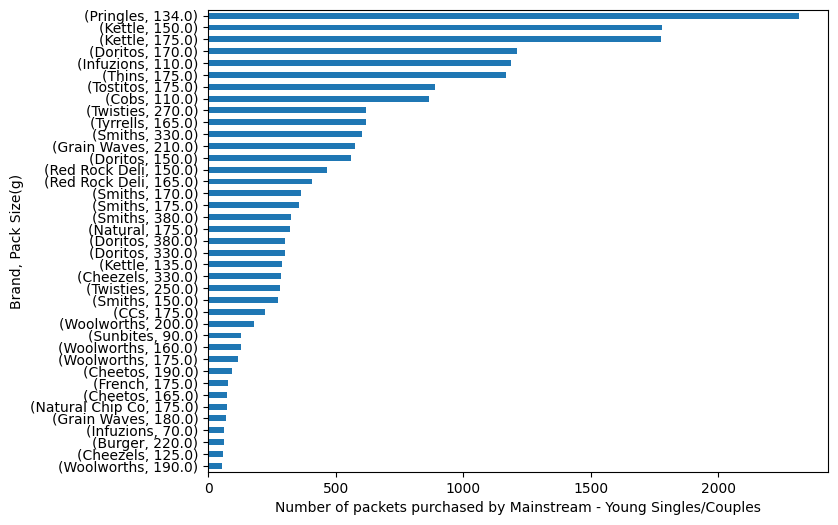

In [207]:
# check the according brands of the packet sizes for segment Mainstream - Young Singles/Couples
ax = main_young.groupby(['BRAND','PACK_SIZE(g)']).size().sort_values(ascending = True).plot.barh(figsize=(8, 6))
ax.set_xlabel("Number of packets purchased by Mainstream - Young Singles/Couples")
ax.set_ylabel("Brand, Pack Size(g)")
plt.show()

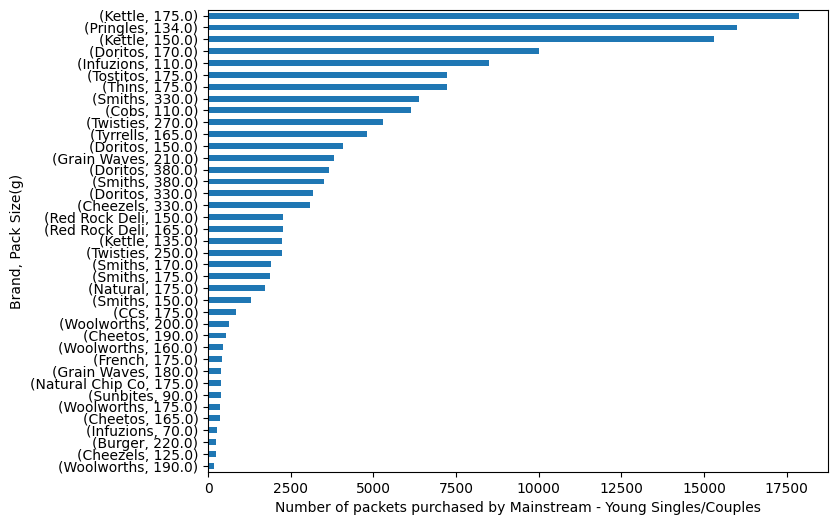

In [208]:
# check the according brands of the packet sizes for segment Mainstream - Young Singles/Couples
ax = main_young.groupby(['BRAND','PACK_SIZE(g)'])['TOT_SALES'].agg('sum').sort_values(ascending = True).plot.barh(figsize=(8, 6))
ax.set_xlabel("Number of packets purchased by Mainstream - Young Singles/Couples")
ax.set_ylabel("Brand, Pack Size(g)")
plt.show()

#### Insight: From Apriori Analysis:
- Overall, 175g packet size is the most popular one for most customer segments.
- For Mainstream - Young Singles/Couples, the most popular packet size is 175g, which is in accordance with the most popular brand Kettle when it comes to total sales. However, when it comes to the number of the chips' packet size & brand prefered by this customer segment, (Kettle, 175g) ranks No.3, after (Pringles, 134g) and (Kettle, 150g).

To see the segment's packet size preferrence over other segments, we can do Affinity Analysis.

### Analyze the Product Size Preference of the Top Customer Group Buyers (Affinity Analysis)

In [125]:
def size_affinity(df, target_lifestage, target_membership):
    """
    Calculate pack size affinity for a target segment compared to others.

    Parameters:
    - segment_df (pd.DataFrame): DataFrame for the target segment.
    - others_df (pd.DataFrame): DataFrame for the other segments.
    - segment_name (str): Name for the target segment (default: 'target').
    - others_name (str): Name for the other segments (default: 'others').

    Returns:
    - pack_prop (pd.DataFrame): DataFrame showing pack size affinities sorted by affinity.
    """

     # Filter data for the target group
    segment = merge_df[(merge_df['LIFESTAGE'] == target_lifestage) & (merge_df['MEMBERSHIP'] == target_membership)]
    others = merge_df[~((merge_df['LIFESTAGE'] == target_lifestage) & (merge_df['MEMBERSHIP'] == target_membership))]

    # Calculate total quantity for segment and others
    qty_segment = segment['PROD_QTY'].sum()
    qty_others = others['PROD_QTY'].sum()

    # Calculate proportions of preferred pack size for segment
    qty_segment_by_pack = segment.groupby('PACK_SIZE(g)')['PROD_QTY'].sum().reset_index()
    qty_segment_by_pack['target_proportion'] = qty_segment_by_pack['PROD_QTY'] / qty_segment
    qty_segment_by_pack = qty_segment_by_pack.drop(columns='PROD_QTY')

    # Calculate proportions of preferred pack size for others
    qty_others_by_pack = others.groupby('PACK_SIZE(g)')['PROD_QTY'].sum().reset_index()
    qty_others_by_pack['others_proportion'] = qty_others_by_pack['PROD_QTY'] / qty_others
    qty_others_by_pack = qty_others_by_pack.drop(columns='PROD_QTY')

    # Merge the two dataframes
    pack_prop = qty_segment_by_pack.merge(qty_others_by_pack, on='PACK_SIZE(g)')

    # Calculate affinity to pack size
    pack_prop['Affinity'] = pack_prop['target_proportion'] / pack_prop['others_proportion']

    # Sort by affinity to pack size
    pack_prop = pack_prop.sort_values(by='Affinity', ascending=False)

    return pack_prop

In [148]:
# Calculate packet size affinity for Budget - Older Families
size_affinity_df = size_affinity(merge_df, 'OLDER FAMILIES', 'Budget')
print(f'Budget - Older Families:\n', size_affinity_df.head(3))

Budget - Older Families:
     PACK_SIZE(g)  target_proportion  others_proportion  Affinity
11         180.0           0.007670           0.005701  1.345403
3          125.0           0.007144           0.005673  1.259381
12         190.0           0.014455           0.011826  1.222333


In [150]:
# Calculate brand affinity for Mainstream - Retirees
size_affinity_df2 = size_affinity(merge_df, 'RETIREES', 'Mainstream')
print(f'Mainstream - Retirees:\n', size_affinity_df2.head(3))

Mainstream - Retirees:
     PACK_SIZE(g)  target_proportion  others_proportion  Affinity
16         250.0           0.014545           0.012759  1.139975
0           70.0           0.006609           0.006022  1.097381
14         210.0           0.027311           0.025266  1.080958


In [144]:
size_affinity_df3 = size_affinity(merge_df, 'YOUNG SINGLES/COUPLES', 'Mainstream')
print(f'Mainstream - Young Singles/Couples:\n', size_affinity_df3)

Mainstream - Young Singles/Couples:
     PACK_SIZE(g)  target_proportion  others_proportion  Affinity
17         270.0           0.031829           0.025096  1.268287
19         380.0           0.032160           0.025584  1.257030
18         330.0           0.061284           0.050162  1.221717
4          134.0           0.119420           0.100635  1.186670
2          110.0           0.106280           0.089791  1.183637
14         210.0           0.029124           0.025121  1.159318
5          135.0           0.014769           0.013075  1.129511
16         250.0           0.014355           0.012781  1.123166
9          170.0           0.080773           0.080986  0.997370
6          150.0           0.157598           0.163421  0.964372
10         175.0           0.254990           0.270007  0.944382
8          165.0           0.055652           0.062268  0.893757
12         190.0           0.007481           0.012442  0.601271
11         180.0           0.003589           0.00606

In [191]:
# check product/brand name of the packet size for Mainstream - Young Singles/Couples preferrence
size270 = merge_df.loc[merge_df['PACK_SIZE(g)']==270, 'PROD_NAME'].unique()
print('Products with packet size = 270g:', size270)

size220 = merge_df.loc[merge_df['PACK_SIZE(g)']==220, 'PROD_NAME'].unique()
print('Products with packet size = 220g:', size220)

Products with packet size = 270g: ['Twisties Cheese     270g' 'Twisties Chicken270g']
Products with packet size = 220g: ['Burger Rings 220g']
Products with packet size = 180g: ['GrnWves Plus Btroot & Chilli Jam 180g']


#### Insight: By using the affinity index, we can see that:
- Budget - Older Families are 35% more likely to buy 180g packet size of chips than other customer segments.
- Mainstream - Retirees are 14% more likely to buy 250g packet size of chips than other customer segments.
- Mainstream - Young Singles/Couples are 27% more likely to purchase 270g packet size of chips than other customer segments; and are 56% less likely to buy 220g pack size of chips. Further analysis shows that, only Brand Twisties sells 270g packet size of chips; only Burger Rings sells 220g packet size of chips, which is consistent with the brand affinity analysis.

# Summary & Recommendation:
1. Overall, the stores sell 105 kinds of chips in total, and gain 1805177.70 dollars of revenue from chips. Customers spend 2-14 dollars on chips per transaction, averagely spend 7.3 dollars on chips per transaction.
- Notably, the day before Christmas Day had the peak number of transaction and the peak total sales of chips, stores are suggested to prepare enough chips, especially the most popular ones in stock. It is also recommended to put chips close to the check out counters, the entrance, and other holiday display sections.
- There was one mechandise customer bought large amount of chips twice in our store.

2. In order to improve sales of chips, for customer category, we should target Mainstream Customer in priority; for customer lifestage, we should target older customers in priority (OLDER SINGLES/COUPLES, OLDER FAMILIES and RETIREES). The three highest contributing customer segments to the total sales are: a) Older families - Budget; b) Young singles/couples - Mainstream; c) Retirees - Mainstream.

- Specially, Mainstream - Young Singles/Couples, follwed by Mainstream - Retirees takes up the largest & second largest proporation of customers, which might be the drive of their significant contribution in total sales of chips. Learn more about these customer segments' behavior would help improve our sales.
- Mainstream-Young & Midage singles and couples are more willing to buy more packet of chips on average and pay more per chips compared to the non-maistream ones, which is indicative of impulse buying behaviour. When we lay out chips in the store, we can consider put more chips in the discretionary areas/sections that favored by/is cater to them.
- While population is not a driving factor for budget older families, Older Families & Young Families buy more chips per customer.

3. When it comes to chips brands selection, For all customers, the most popular chips' brands are a) Kettle; b) Smiths; c) Doritos.
For out target customer segments:
- Budget - Older Families are 38% more likely to buy Natural Chip Co chips than the rest of the customers.
- Mainstream - Retirees are 18% less likely to buy French chips than the rest of the customers.
- Mainstream - Young Singles/Couples are 23% more likely to purcahse Tyrrells chips than the other segments. However, they are 56% less likely to purchase Burger Rings compared to the rest of the population.
The stores can display the most popular brands of chips in the store sections where are more visiable for all customers and our target customer groups.


4. When is comes to pack size, 175g is the most popular packet size among all customers. In general, medium-to-large size chips seems more popular.
For our target customer segments:
- Budget - Older Families are 35% more likely to buy 180g packet size of chips than other customer segments.
- Mainstream - Retirees are 14% more likely to buy 250g packet size of chips than other customer segments.
- Mainstream - Young Singles/Couples prefer 175g packet size the most. They are 27% more likely to purchase 270g packet size of chips than other customer segments; and are 56% less likely to buy 220g pack size of chips. Further analysis shows that, only Brand Twisties sells 270g packet size of chips and only Burger Rings sells 220g packet size of chips, which is consistent with the brand affinity analysis.

5. It is suggested that the stores should improve their product naming system/format, such as naming the product name in a format like "Brand & Flavor & ProductCategory & Weight/Size", to avoid statistical bias. The reasons are:
- a) The original database lacks of clarification in product category. It is also not easy to tell if the product is chips product, cheese product, or salsa product or other kinds just by looking at the product names. This can lead to siginicant bias from different kinds of misunderstanding.
- b) The brand names and product category in the current product name column are not unique. One brand has more than one brand names, and chip product has more than one category name. Without further communication with the stores, or fully understanding of products, analyst might generate analysis with bias or just inaccurate.
